# **<font color='Red'>"SENTIMENT ANALYSIS ON MOVIE REVIEWS"</font>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import TweetTokenizer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv('/content/drive/MyDrive/CognoRiseInfoTech/IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
df=df.iloc[0:10000,:]
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative


In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.tail()

,review,sentiment
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative
9999,Smashing film about film-making. Shows the int...,positive


In [6]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [7]:
df['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [8]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [9]:
df.dtypes

review       object
sentiment    object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [11]:
df.duplicated().sum()

17

In [12]:
df=df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(9983, 2)

In [15]:
df['sentiment'].value_counts()

sentiment
positive    5023
negative    4960
Name: count, dtype: int64

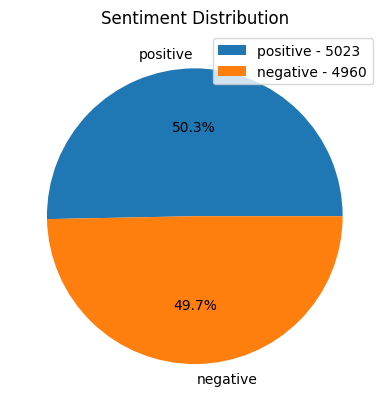

In [16]:
plt.pie(df['sentiment'].value_counts(),labels=df['sentiment'].value_counts().index,autopct='%1.1f%%')
plt.legend( labels=[f"{label} - {value}" for label, value in zip(df['sentiment'].value_counts().index,df['sentiment'].value_counts())], loc="upper right")
plt.title('Sentiment Distribution')
plt.show()

In [17]:
msg=df['review']
msg

0       One of the other reviewers has mentioned that ...
1       A wonderful little production. <br /><br />The...
2       I thought this was a wonderful way to spend ti...
3       Basically there's a family where a little boy ...
4       Petter Mattei's "Love in the Time of Money" is...
                              ...                        
9995    Fun, entertaining movie about WWII German spy ...
9996    Give me a break. How can anyone say that this ...
9997    This movie is a bad movie. But after watching ...
9998    This is a movie that was probably made to ente...
9999    Smashing film about film-making. Shows the int...
Name: review, Length: 9983, dtype: object

In [18]:
msg=msg.str.replace("[^a-zA-Z0-9 ]"," ",regex=True)
msg

0       One of the other reviewers has mentioned that ...
1       A wonderful little production   br    br   The...
2       I thought this was a wonderful way to spend ti...
3       Basically there s a family where a little boy ...
4       Petter Mattei s  Love in the Time of Money  is...
                              ...                        
9995    Fun  entertaining movie about WWII German spy ...
9996    Give me a break  How can anyone say that this ...
9997    This movie is a bad movie  But after watching ...
9998    This is a movie that was probably made to ente...
9999    Smashing film about film making  Shows the int...
Name: review, Length: 9983, dtype: object

In [19]:
l=SnowballStemmer('english')
s=stopwords.words('english')
t=TweetTokenizer()

In [20]:
msg=msg.apply(lambda line:[l.stem(i.lower()) for i in t.tokenize(line)]).apply(lambda i:" ".join(i))
msg

0       one of the other review has mention that after...
1       a wonder littl product br br the film techniqu...
2       i thought this was a wonder way to spend time ...
3       basic there s a famili where a littl boy jake ...
4       petter mattei s love in the time of money is a...
                              ...                        
9995    fun entertain movi about wwii german spi juli ...
9996    give me a break how can anyon say that this is...
9997    this movi is a bad movi but after watch an end...
9998    this is a movi that was probabl made to entert...
9999    smash film about film make show the intens and...
Name: review, Length: 9983, dtype: object

In [21]:
msg=msg.apply(lambda line:[i for i in t.tokenize(line) if i not in s]).apply(lambda i:" ".join(i))
msg

0       one review mention watch 1 oz episod hook righ...
1       wonder littl product br br film techniqu veri ...
2       thought wonder way spend time hot summer weeke...
3       basic famili littl boy jake think zombi closet...
4       petter mattei love time money visual stun film...
                              ...                        
9995    fun entertain movi wwii german spi juli andrew...
9996    give break anyon say good hockey movi know mov...
9997    movi bad movi watch endless seri bad horror mo...
9998    movi probabl made entertain middl school earli...
9999    smash film film make show intens strang relati...
Name: review, Length: 9983, dtype: object

In [22]:
v=TfidfVectorizer()
vect=v.fit_transform(msg)
print(vect)

  (0, 28110)	0.04879617538115665
  (0, 7870)	0.07890937173801264
  (0, 31532)	0.04982744334778182
  (0, 33364)	0.04461785385710768
  (0, 32324)	0.07562314151365178
  (0, 6593)	0.06801449434080424
  (0, 3120)	0.04078968652800564
  (0, 19437)	0.03960304084382308
  (0, 10631)	0.048198346522728384
  (0, 28358)	0.06136674289637915
  (0, 29746)	0.05639540286527938
  (0, 17432)	0.04530898619954854
  (0, 3608)	0.08228947756066889
  (0, 32006)	0.03779289736848393
  (0, 6229)	0.054765673759120656
  (0, 20000)	0.0544268018572934
  (0, 19058)	0.060856647894301355
  (0, 33981)	0.027054899537279645
  (0, 12548)	0.05004385902849311
  (0, 22285)	0.05164468637800394
  (0, 16977)	0.0408267351349336
  (0, 15546)	0.18553780090820854
  (0, 21495)	0.10410163067987942
  (0, 28794)	0.07425835114817975
  (0, 13409)	0.07088627392087057
  :	:
  (9982, 747)	0.093034210072093
  (9982, 11265)	0.08242190989620388
  (9982, 33750)	0.06707534492715533
  (9982, 25575)	0.10669279682421325
  (9982, 10878)	0.11819912164310

In [23]:
vect.shape

(9983, 35163)

In [24]:
X=vect.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
df1=pd.DataFrame(X)
df1

,0,1,2,3,4,5,6,7,8,9,...,35153,35154,35155,35156,35157,35158,35159,35160,35161,35162
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
le=LabelEncoder()
df['sentiment']=le.fit_transform(df['sentiment'])

In [38]:
mapp=list(zip(le.classes_,le.transform(le.classes_)))
mapp

[('negative', 0), ('positive', 1)]

In [27]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",1
9996,Give me a break. How can anyone say that this ...,0
9997,This movie is a bad movie. But after watching ...,0
9998,This is a movie that was probably made to ente...,0


In [28]:
y=df['sentiment']
y

0       1
1       1
2       1
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    0
9999    1
Name: sentiment, Length: 9983, dtype: int64

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [30]:
X_train.shape,X_test.shape

((6988, 35163), (2995, 35163))

In [31]:
y_train.shape,y_test.shape

((6988,), (2995,))

LogisticRegression()
********************************************************
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1445
           1       0.87      0.92      0.89      1550

    accuracy                           0.89      2995
   macro avg       0.89      0.89      0.89      2995
weighted avg       0.89      0.89      0.89      2995


MultinomialNB()
********************************************************
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1445
           1       0.89      0.82      0.85      1550

    accuracy                           0.85      2995
   macro avg       0.86      0.85      0.85      2995
weighted avg       0.86      0.85      0.85      2995


RandomForestClassifier(n_estimators=50, random_state=1)
********************************************************
              precision    recall  f1-score   support

           0       0.81  

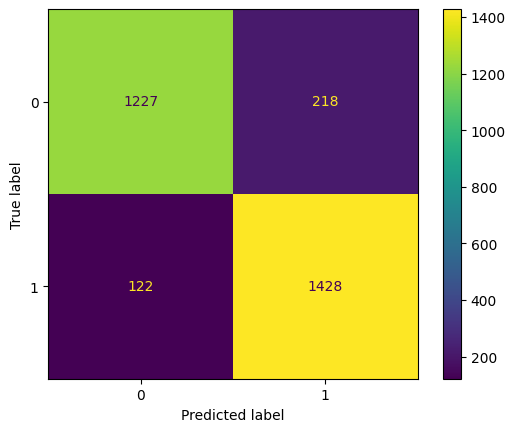

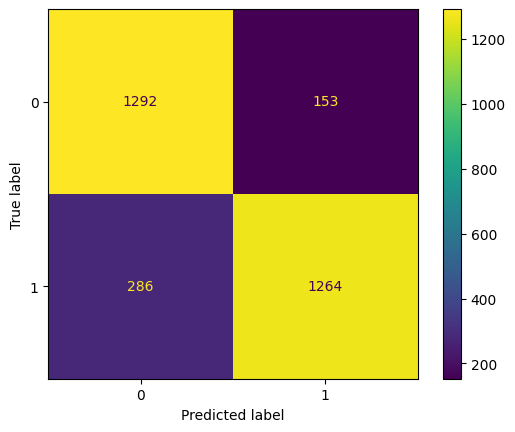

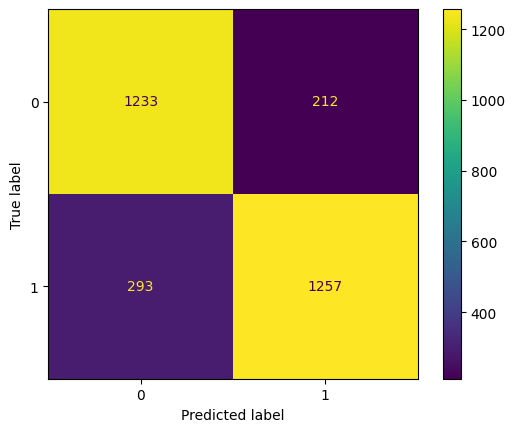

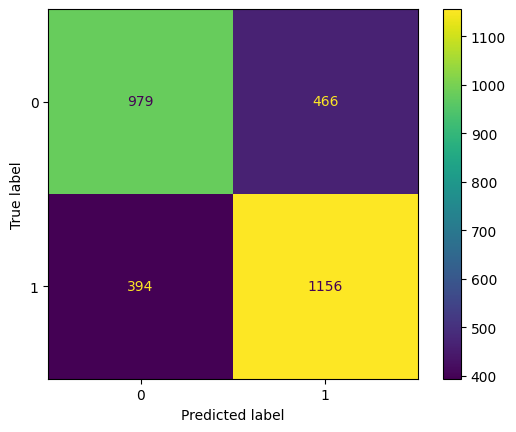

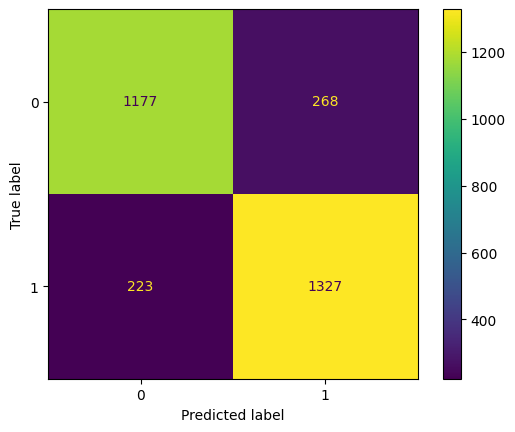

In [39]:
lc=LogisticRegression()
m=MultinomialNB()
r=RandomForestClassifier(n_estimators=50,random_state=1)
k=KNeighborsClassifier(n_neighbors=3)
x=XGBClassifier(random_state=1)


lists=[lc,m,r,k,x]
for i in lists:
  print(i)
  print("********************************************************")
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print()

In [41]:
y_new=m.predict(v.transform(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side."]))
if y_new==0:
  print('Negative')
else:
  print('positive')

positive


In [40]:
y_new1=m.predict(v.transform(["Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."]))
if y_new1==0:
  print('Negative')
else:
  print('positive')

Negative


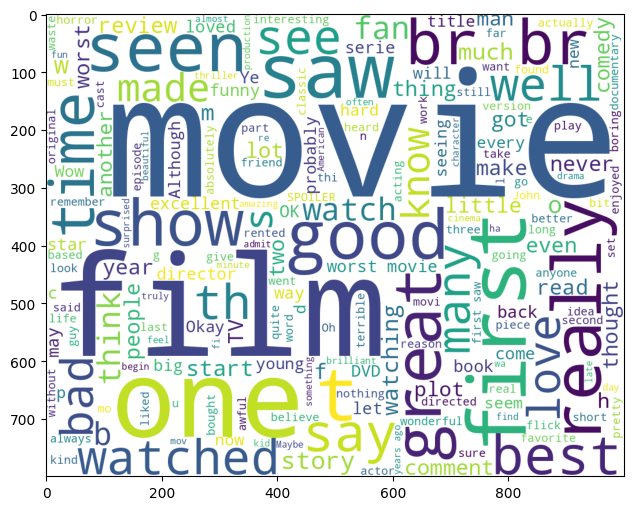

In [35]:

wc=WordCloud(width=1000,height=800,background_color='White',min_font_size=10).generate(df['review'].to_string())
plt.figure(figsize = (15,6))
plt.imshow(wc)
